In [1]:
from sklearn.linear_model import (
    LinearRegression, LogisticRegression,
    SGDClassifier, SGDRegressor
)
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVC, LinearSVC, SVR
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import (
    GaussianNB, MultinomialNB, BernoulliNB,
    CategoricalNB, ComplementNB
)

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_wine, fetch_california_housing

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix, classification_report,
    mean_absolute_error, mean_squared_error, r2_score
)

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.float_format', lambda x: f'{x:.4f}')

In [2]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

# <p align='center' style='color: #6c89c6;'>Работу выполнил: Таратин Артём ПМ22-1</p>

#### 1. Загрузите данные о вероятности развития сердечного приступа, прилагающийся к этой работе (heart.csv).

In [3]:
data = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/main/ML4.1%20metrics/heart.csv')
data

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3000,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5000,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4000,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8000,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6000,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2000,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2000,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4000,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2000,1,1,3,0


#### 2. Обучите на этих данных простую модель логистической регрессии и выведите метрику точности (accuracy).

In [4]:
y = data['output']
x = data.drop('output', axis=1)

logistic = LogisticRegression(max_iter=10000).fit(x, y)
logistic.score(x, y)

0.8481848184818482

#### 3. Разделите датасет на две части - первую половину используйте для обучения, а вторую - для оценки точности. Сравните значения метрик.

In [5]:
x_train, y_train = x[:200], y[:200]
x_train.shape, y_train.shape
x_test, y_test = x[200:], y[200:]
x_test.shape, y_test.shape

# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

((103, 13), (103,))

In [6]:
logistic_test = LogisticRegression(max_iter=10000).fit(x_train, y_train)
logistic_test.score(x_train, y_train), logistic_test.score(x_test, y_test)

(0.905, 0.5242718446601942)

In [7]:
N = int(x.shape[0] * 0.8)

x_train, y_train, x_test, y_test = x[:N], y[:N], x[N:], y[N:]
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((242, 13), (242,), (61, 13), (61,))

In [8]:
logistic_test = LogisticRegression(max_iter=10000).fit(x_train, y_train)
logistic_test.score(x_train, y_train), logistic_test.score(x_test, y_test)

(0.8925619834710744, 0.6229508196721312)

In [9]:
data.tail()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
298,57,0,0,140,241,0,1,123,1,0.2000,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2000,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4000,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2000,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0000,1,1,2,0


#### 4. Разделите датасет на две части случайным образом. Повторите анализ.

In [10]:
mask = np.array([True] * N + [False] * (y.shape[0] - N))
np.random.shuffle(mask)
mask[:20]

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True, False,  True,  True,
        True,  True])

In [11]:
x_train, y_train, x_test, y_test = x[mask], y[mask], x[~mask], y[~mask]
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((242, 13), (242,), (61, 13), (61,))

In [12]:
logistic_test = LogisticRegression(max_iter=10000).fit(x_train, y_train)
logistic_test.score(x_train, y_train), logistic_test.score(x_test, y_test)

(0.859504132231405, 0.8032786885245902)

#### 5. Разделите датасет с помощью библиотечной функции. Повторите анализ несколько раз.

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=42)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((242, 13), (242,), (61, 13), (61,))

In [14]:
logistic_test = LogisticRegression(max_iter=10000).fit(x_train, y_train)
logistic_test.score(x_train, y_train), logistic_test.score(x_test, y_test)

(0.8636363636363636, 0.8852459016393442)

#### 6. Постройте матрицу классификации и отчет о классификации для обученной модели для обучающей и тестовой выборок. Проинтерпретируйте полученные значения.

In [15]:
y_test_pred = logistic_test.predict(x_test)
y_train_pred = logistic_test.predict(x_train)

<Axes: >

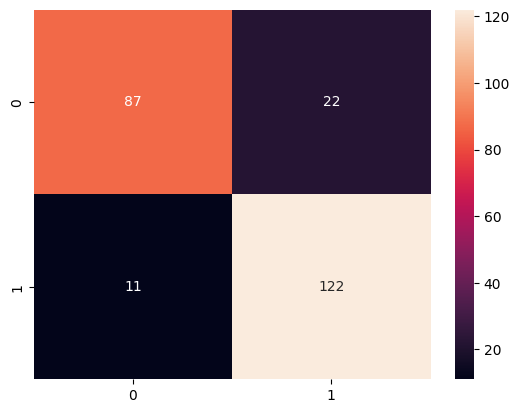

In [16]:
# train
sns.heatmap(confusion_matrix(y_train, y_train_pred), annot=True, fmt='.5g')

<Axes: >

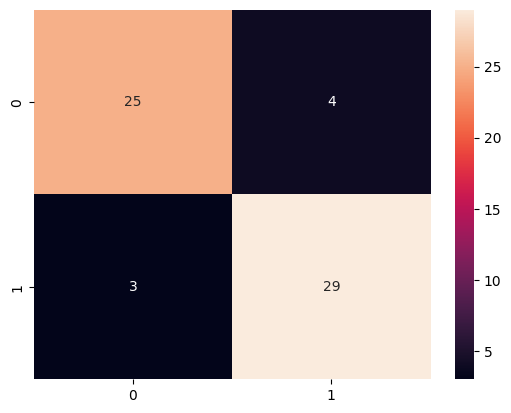

In [17]:
# test
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt='.5g')

#### 7. Подсчитайте для построенной модели значение всех метрик эффективности классификации на тестовой и обучающей выборках. Нужно использовать следующие метрики: accuracy, precision, recall, f1.

In [18]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



In [19]:
metrics = pd.DataFrame({
    'Train': [
        accuracy_score(y_train, y_train_pred),
        precision_score(y_train, y_train_pred),
        recall_score(y_train, y_train_pred),
        f1_score(y_train, y_train_pred),
    ],
    'Test': [
        accuracy_score(y_test, y_test_pred),
        precision_score(y_test, y_test_pred),
        recall_score(y_test, y_test_pred),
        f1_score(y_test, y_test_pred),
    ],
}, index = ['Accuracy', 'Precision', 'Recall', 'F1'])

metrics

,Train,Test
Accuracy,0.8636,0.8852
Precision,0.8472,0.8788
Recall,0.9173,0.9062
F1,0.8809,0.8923


## Задания для самостоятельного выполнения
#### 1. Повторите анализ для других видов моделей. Используйте 5-10 разных классов моделей. Подсчитывайте только метрики на тестовой выборке.

In [20]:
logreg = LogisticRegression(max_iter=10000)
svm_linear = SVC(kernel='linear')
svm_poly = SVC(kernel='poly')
svm_rbf = SVC(kernel='rbf')

clf = MLPClassifier(hidden_layer_sizes=[100]*4, max_iter=10000)
clf_tree = DecisionTreeClassifier(criterion='entropy', max_depth=4)

gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()
compnb = ComplementNB()

In [21]:
models = [
    logreg, svm_linear, svm_poly,
    svm_rbf, clf, clf_tree,
    gnb, mnb, bnb, compnb
]

In [22]:
for model_id in range(len(models)):
    models[model_id].fit(x_train, y_train)
    y_test_pred = models[model_id].predict(x_test)
    class_report = classification_report(y_test, y_test_pred, zero_division=0)
    conf_mat = confusion_matrix(y_test, y_test_pred)
    print(f'{models[model_id]}\n\n{conf_mat}\n\n{class_report}', end='-'*60 + '\n'*3)

LogisticRegression(max_iter=10000)

[[25  4]
 [ 3 29]]

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61
------------------------------------------------------------


SVC(kernel='linear')

[[25  4]
 [ 4 28]]

              precision    recall  f1-score   support

           0       0.86      0.86      0.86        29
           1       0.88      0.88      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61
------------------------------------------------------------


SVC(kernel='poly')

[[20  9]
 [ 5 27]]

              precision    recall  f1-score   support

           0       0.80      

MLPClassifier(hidden_layer_sizes=[100, 100, 100, 100], max_iter=10000)

[[24  5]
 [10 22]]

              precision    recall  f1-score   support

           0       0.71      0.83      0.76        29
           1       0.81      0.69      0.75        32

    accuracy                           0.75        61
   macro avg       0.76      0.76      0.75        61
weighted avg       0.76      0.75      0.75        61
------------------------------------------------------------


DecisionTreeClassifier(criterion='entropy', max_depth=4)

[[26  3]
 [ 4 28]]

              precision    recall  f1-score   support

           0       0.87      0.90      0.88        29
           1       0.90      0.88      0.89        32

    accuracy                           0.89        61
   macro avg       0.88      0.89      0.89        61
weighted avg       0.89      0.89      0.89        61
------------------------------------------------------------


GaussianNB()

[[26  3]
 [ 5 27]]

              prec

#### 2. Повторите анализ для другого датасета по вашему выбору. Используйте несколько моделей для сравнения. Используйте датасет для множественной классификации.

In [23]:
iris = load_wine()
x, y = iris.data, iris.target
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [24]:
for model_id in range(len(models)):
    models[model_id].fit(x_train, y_train)
    y_test_pred = models[model_id].predict(x_test)
    class_report = classification_report(y_test, y_test_pred, zero_division=0)
    conf_mat = confusion_matrix(y_test, y_test_pred)
    print(f'{models[model_id]}\n\n{conf_mat}\n\n{class_report}', end='-'*60 + '\n'*3)

LogisticRegression(max_iter=10000)

[[14  0  0]
 [ 0 14  0]
 [ 0  0  8]]

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36
------------------------------------------------------------


SVC(kernel='linear')

[[14  0  0]
 [ 0 14  0]
 [ 0  0  8]]

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36
-------------------------------------------

#### 3. Повторите анализ для датасета, предназначенного для решения задачи регрессии. Используйте все метрики качества регрессии, изученные на лекции. Постройте 5 - 10 разных моделей регрессии.

In [25]:
california_housing = fetch_california_housing()
x, y = california_housing.data, california_housing.target
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [26]:
reg = LinearRegression()
reg_poly_2 = Pipeline([
    ('poly', PolynomialFeatures(2)),
    ('reg', LinearRegression())
])
svr_poly = SVR(kernel='poly', degree=1)
svr_rbf = SVR(kernel='rbf')
tree = DecisionTreeRegressor(max_depth=20)
random_forest = RandomForestRegressor(max_depth=20)

models = [
    reg, reg_poly_2, svr_rbf,
    svr_poly, tree, random_forest,
]

In [27]:
for model_id in range(len(models)):
    models[model_id].fit(x_train, y_train)
    y_test_pred = models[model_id].predict(x_test)
    
    mae = mean_absolute_error(y_test, y_test_pred)
    mse = mean_squared_error(y_test, y_test_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_test_pred)
    
    print(f'{models[model_id]}')
    print(f'R^2: {r2:.4f}')
    print(f'MAE: {mae:.4f}')
    print(f'MSE: {mse:.4f}')
    print('-'*60 + '\n'*2)

LinearRegression()
R^2: 0.5758
MAE: 0.5332
MSE: 0.5559
------------------------------------------------------------


Pipeline(steps=[('poly', PolynomialFeatures()), ('reg', LinearRegression())])
R^2: 0.6457
MAE: 0.4670
MSE: 0.4643
------------------------------------------------------------


SVR()
R^2: -0.0165
MAE: 0.8600
MSE: 1.3320
------------------------------------------------------------


SVR(degree=1, kernel='poly')
R^2: -0.0296
MAE: 0.8656
MSE: 1.3492
------------------------------------------------------------


DecisionTreeRegressor(max_depth=20)
R^2: 0.6226
MAE: 0.4541
MSE: 0.4946
------------------------------------------------------------


RandomForestRegressor(max_depth=20)
R^2: 0.8056
MAE: 0.3271
MSE: 0.2548
------------------------------------------------------------




## Дополнительные задания
#### 1. Постройте график зависимости метрик качества классификации из методических указаний от процента выборки, отводимого на тестовую часть.

In [28]:
x, y = data.drop('output', axis=1), data['output']
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8)

In [29]:
logistic = LogisticRegression(max_iter=10000).fit(x_train, y_train)
y_test_pred = logistic.predict(x_test)
accuracy_score(y_test, y_test_pred)

0.819672131147541

In [30]:
spread = np.arange(0.02, 1, 0.02)
train_score_list = {i: list() for i in spread}
test_score_list = {i: list() for i in spread}
train_f1_list = {i: list() for i in spread}
test_f1_list = {i: list() for i in spread}
repeat = 15

In [31]:
for num in train_score_list:
    counter = 0
    while counter < repeat:
        try:
            x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=num)
            logistic = LogisticRegression(max_iter=10000).fit(x_train, y_train)
            
            y_train_pred = logistic.predict(x_train)
            y_test_pred = logistic.predict(x_test)
            
            train_score = accuracy_score(y_train, y_train_pred)
            test_score = accuracy_score(y_test, y_test_pred)
            
            train_score_list[num].append(train_score)
            test_score_list[num].append(test_score)
            
            train_f1 = f1_score(y_train, y_train_pred)
            test_f1 = f1_score(y_test, y_test_pred)
            
            train_f1_list[num].append(train_f1)
            test_f1_list[num].append(test_f1)
            
            counter += 1
        except:
            pass

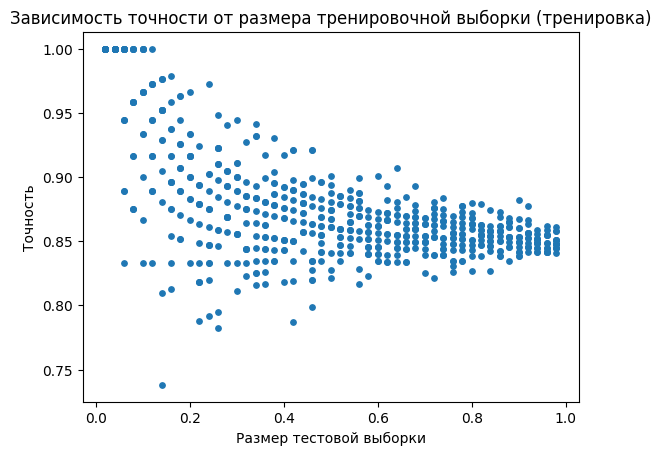

In [32]:
plt.scatter(
    sorted(list(train_score_list.keys())*repeat),
    np.array(list(train_score_list.values())).flatten(),
    s=15
)
plt.title('Зависимость точности от размера тренировочной выборки (тренировка)')
plt.xlabel('Размер тестовой выборки')
plt.ylabel('Точность')
plt.show()

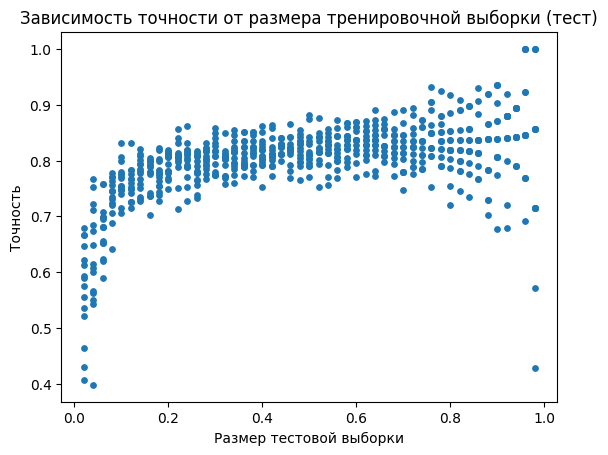

In [33]:
plt.scatter(
    sorted(list(test_score_list.keys())*repeat),
    np.array(list(test_score_list.values())).flatten(),
    s=15
)
plt.title('Зависимость точности от размера тренировочной выборки (тест)')
plt.xlabel('Размер тестовой выборки')
plt.ylabel('Точность')
plt.show()

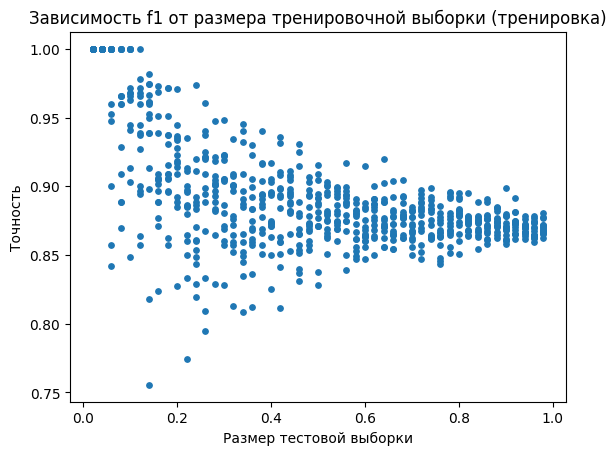

In [34]:
plt.scatter(
    sorted(list(train_f1_list.keys())*repeat),
    np.array(list(train_f1_list.values())).flatten(),
    s=15
)
plt.title('Зависимость f1 от размера тренировочной выборки (тренировка)')
plt.xlabel('Размер тестовой выборки')
plt.ylabel('Точность')
plt.show()

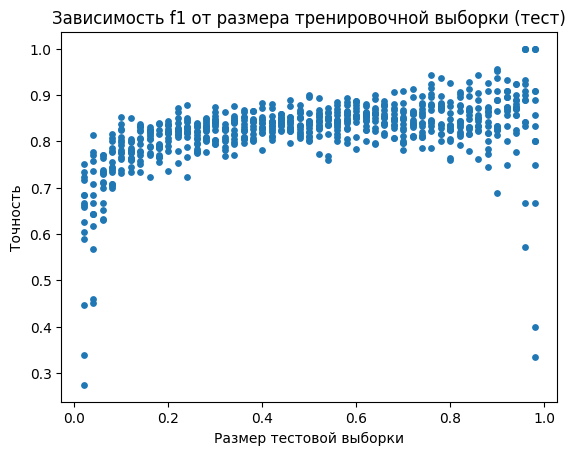

In [35]:
plt.scatter(
    sorted(list(test_f1_list.keys())*repeat),
    np.array(list(test_f1_list.values())).flatten(),
    s=15
)
plt.title('Зависимость f1 от размера тренировочной выборки (тест)')
plt.xlabel('Размер тестовой выборки')
plt.ylabel('Точность')
plt.show()

#### 2. Создайте универсальную функцию, которая подсчитывает все метрики по любой модели и выводит их в виде таблицы.

In [36]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    
    match model._estimator_type:
        case 'regressor':
            mse = mean_squared_error(y_test, y_pred)
            mae = mean_absolute_error(y_test, y_pred)
            r2 = r2_score(y_test, y_pred)
            
            metrics_table = pd.DataFrame({
                'Metric': ['R^2', 'MAE', 'MSE'],
                'Value': [r2, mae, mse]
            })
        case 'classifier':
            accuracy = accuracy_score(y_test, y_pred)
            precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
            recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
            f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
            
            metrics_table = pd.DataFrame({
                'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
                'Value': [accuracy, precision, recall, f1]
            })

    return metrics_table

In [37]:
x, y = data.drop('output', axis=1), data['output']
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8)

In [38]:
logistic = LogisticRegression(max_iter=10000).fit(x_train, y_train)
y_test_pred = logistic.predict(x_test)
accuracy_score(y_test, y_test_pred)

0.819672131147541

In [39]:
evaluate_model(logistic, x_test, y_test)

,Metric,Value
0,Accuracy,0.8197
1,Precision,0.8202
2,Recall,0.8197
3,F1 Score,0.8179


In [40]:
x = np.linspace(0, 20, 120)
y = x*2 + 10
x_train, x_test, y_train, y_test = train_test_split(x.reshape(-1, 1), y, train_size=0.8)

In [41]:
linear = LinearRegression().fit(x_train, y_train)
y_test_pred = linear.predict(x_test)
r2_score(y_test, y_test_pred)

1.0

In [42]:
evaluate_model(linear, x_test, y_test)

,Metric,Value
0,R^2,1.0000
1,MAE,0.0000
2,MSE,0.0000


#### 3. Создайте функцию, принимающая на вход датасет, которая проверяет наибольшее количество разных моделей машинного обучения и выдающая датафрейм с таблицей всех метрик.

In [6]:
def evaluate_models(dataset):
    X, y = dataset.data, dataset.target
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)
    
    is_regressor = len(set(dataset.target)) > 20
    
    if is_regressor:
        models = [
            LinearRegression(),
            Pipeline([
                ('poly', PolynomialFeatures(2)),
                ('reg', LinearRegression())
            ]),
            SVR(kernel='poly', degree=3),
            SVR(kernel='rbf'),
            RandomForestRegressor(),
            DecisionTreeRegressor(),
            KNeighborsRegressor(),
        ]
    
    else:
        models = [
            LogisticRegression(max_iter=10000),
            SVC(kernel='linear'),
            SVC(kernel='poly', degree=3),
            SVC(kernel='rbf'),
            SVC(kernel='sigmoid'),
            RandomForestClassifier(),
            KNeighborsClassifier(),
            GaussianNB(),
            MultinomialNB(),
            DecisionTreeClassifier(),
            SGDClassifier(max_iter=10000),
        ]
    
    
    results = []
    for model in models:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        if is_regressor:
            r2 = r2_score(y_test, y_pred)
            mae = mean_absolute_error(y_test, y_pred)
            mse = mean_squared_error(y_test, y_pred)
            text = {'Model': str(model), 'R^2': r2, 'MAE': mae, 'MSE': mse}
        else:
            accuracy = accuracy_score(y_test, y_pred)
            precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
            recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
            f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
            text = {'Model': str(model), 'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1 Score': f1}
        
        results.append(text)

    results_df = pd.DataFrame(results)
    
    return results_df.round(4)

In [7]:
iris = load_wine()
evaluate_models(iris)

,Model,Accuracy,Precision,Recall,F1 Score
0,LogisticRegression(max_iter=10000),1.0000,1.0000,1.0000,1.0000
1,SVC(kernel='linear'),1.0000,1.0000,1.0000,1.0000
2,SVC(kernel='poly'),0.8333,0.8717,0.8333,0.7943
3,SVC(),0.8056,0.8011,0.8056,0.8024
4,SVC(kernel='sigmoid'),0.1667,0.1014,0.1667,0.1261
5,RandomForestClassifier(),1.0000,1.0000,1.0000,1.0000
6,KNeighborsClassifier(),0.7222,0.7222,0.7222,0.7222
7,GaussianNB(),1.0000,1.0000,1.0000,1.0000
8,MultinomialNB(),0.8889,0.8866,0.8889,0.8828
9,DecisionTreeClassifier(),0.9444,0.9463,0.9444,0.9440


In [54]:
california_housing = fetch_california_housing()
evaluate_models(california_housing)

,Model,R^2,MAE,MSE
0,LinearRegression(),0.5758,0.5332,0.5559
1,"Pipeline(steps=[('poly', PolynomialFeatures())...",0.6457,0.4670,0.4643
2,SVR(kernel='poly'),-0.0292,0.8632,1.3486
3,SVR(),-0.0165,0.8600,1.3320
4,RandomForestRegressor(),0.8063,0.3263,0.2538
5,DecisionTreeRegressor(),0.6152,0.4598,0.5043
6,KNeighborsRegressor(),0.1463,0.8128,1.1187
